# Колико смо далеко од одрживог развоја?
У претходним лекцијама одељка о еколошком отиску бавили смо се (материјалним) благостањем нација израженим кроз индекс хуманог развоја, категорију просечних прихода становика и бруто домаћи производ (БДП) по становнику. Присетите се да смо ову последњу варијаблу прочистили јер је садржала доларску ознаку и зарез због којих је третирана као текстуална. У коригованој табели, ове вредности су квантитавине и односе се на просечан приход државе остварен производњом роба и услуга у домаћој економији. Неспорно је да индустрија и стварање адекватних услова за живот захтева трошење природних ресурса. У наредним анализама ћемо се позабавити односима поменутих варијабли како бисмо видели да ли већи развој носи са собом и већи еколошки отисак. 
<BR><BR>
Најпре ћемо учитати кориговану табелу са подацима.

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Сада ћемо проверити да ли је већа економска развијеност земље повезана са већим благостањем њених становника, овога пута израженим кроз очекивану дужину животног века. Како бисмо детаљније анализирали природу те повезаности, претходно ћемо поделити државе у две категорија - оне у којима је очекивани животни век дужи од 72 године и оне у којима је кражи од 73. 

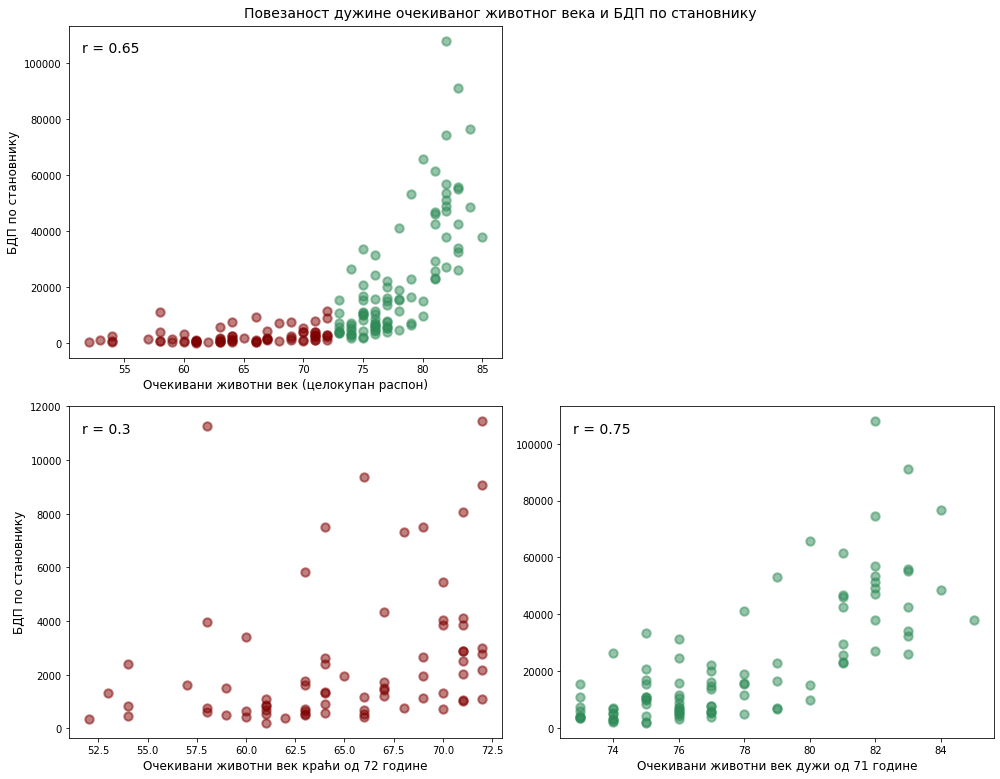

In [2]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,11))

# Само државе са очекиваним животним веком краћим од 72 године
kraLE = otisak[otisak['Life Expectancy'] < 73][['Life Expectancy', 'GDP per cap', 'Country']].sort_values('GDP per cap', ascending=False).reset_index()
# Само државе са очекиваним животним веком дужим од 71 године
duzLE = otisak[otisak['Life Expectancy'] > 72][['Life Expectancy', 'GDP per cap', 'Country']].sort_values('GDP per cap', ascending=False).reset_index()

# На истом графикону цртамо оба скупа података различиим бојама
ax1.scatter(x=kraLE['Life Expectancy'], y=kraLE['GDP per cap'], color='maroon', alpha=0.5, s=70, linewidth=2)
ax1.scatter(x=duzLE['Life Expectancy'], y=duzLE['GDP per cap'], color='seagreen', alpha=0.5, s=70, linewidth=2)
ax1.text(0.03, 0.92, 'r = ' + str(otisak[['Life Expectancy', 'GDP per cap']].corr().iloc[0,1].round(2)), transform = ax1.transAxes, fontsize=14)
ax1.set_ylabel('БДП по становнику', fontsize=12)
ax1.set_xlabel('Очекивани животни век (целокупан распон)', fontsize=12)

ax2.set_axis_off()

ax3.scatter(x=kraLE['Life Expectancy'], y=kraLE['GDP per cap'], color='maroon', alpha=0.5, s=70, linewidth=2)
ax3.text(0.03, 0.92, 'r = ' + str(kraLE[['Life Expectancy', 'GDP per cap']].corr().iloc[0,1].round(2)), transform = ax3.transAxes, fontsize=14)
ax3.set_ylabel('БДП по становнику', fontsize=12)
ax3.set_xlabel('Очекивани животни век краћи од 72 године', fontsize=12)

ax4.scatter(x=duzLE['Life Expectancy'], y=duzLE['GDP per cap'], color='seagreen', alpha=0.5, s=70, linewidth=2)
ax4.text(0.03, 0.92, 'r = ' + str(duzLE[['Life Expectancy', 'GDP per cap']].corr().iloc[0,1].round(2)), transform = ax4.transAxes, fontsize=14)
ax4.set_xlabel('Очекивани животни век дужи од 71 године', fontsize=12)

# Овде уметните код за обележавање тачкица. Приликом формирања скупова kraLE и duzLE сортирали смо државе по 
# опадајућим вредностима БДП-а како бисмо могли да издвојимо само неколико аберантних резултата на графикону.

fig.suptitle('Повезаност дужине очекиваног животног века и БДП по становнику', fontsize=14)
fig.tight_layout()


На горњем графикону приказана је повезаност БДП и дужине животног века за све државе. Кружиће смо учинили делимично провидним како би се јасније видело "гомилање" кружића око блиских вредности. Видимо да је корелација релативно висока и износи 0,65. Међутим, очигледно је да се интензитет везе разликује унутар две подкатегорије држава. На доњим графиконима приказане су исте корелације, али појединачно за државе одређене категорије. Имајте на уму да су се распони оса изменили у складу са распонима вредности, али однос и распршење зелених, односно црвених тачкица је потпуно исти на доњим графиконима, као и на горњем. Видимо да је корелација у црвеној групи знатно нижа, док је у зеленој заправо виша него на укупном узорку. Овај феномен је у статистици познат као __[*Симпсонов парадокс*](https://en.wikipedia.org/wiki/Simpson%27s_paradox)__ и обично настаје као последица ограничавања распона неке варијабле. Приликом рачунања корелације варијабли увек треба обратити пажњу на то да ли закључак који је донет на укупном узорку важи и за сваки подузорак испитаника. У томе нам, наравно, највише помаже дијаграм распршења. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>На црвеном графикону постоји држава која има абернатну позицију и која се може сматрати аутлајером. Због ње је коефицијент корелације вероватно нижи него што би био када би се уклонила. Покушајте да измените услов за формирање скупа <i>kraLE</i> тако да ова држава буде искључена из анализе.</div>

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Пронађите начин да додате називе држава уз тачкице на графикону да бисмо видели која држава је аутлајер. Као полазна основа може да вам послужи <a href='https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point' target='_blank'>овај чланак</a>. Ако се не снађете, искористите код из датотеке <a href='podaci/anotacije.txt' target='_blank'>anotacije.txt</a>.</div> 

Погледајмо сада у каквом је односу БДП са индексом хуманог развоја и укупним еколошким отиском.

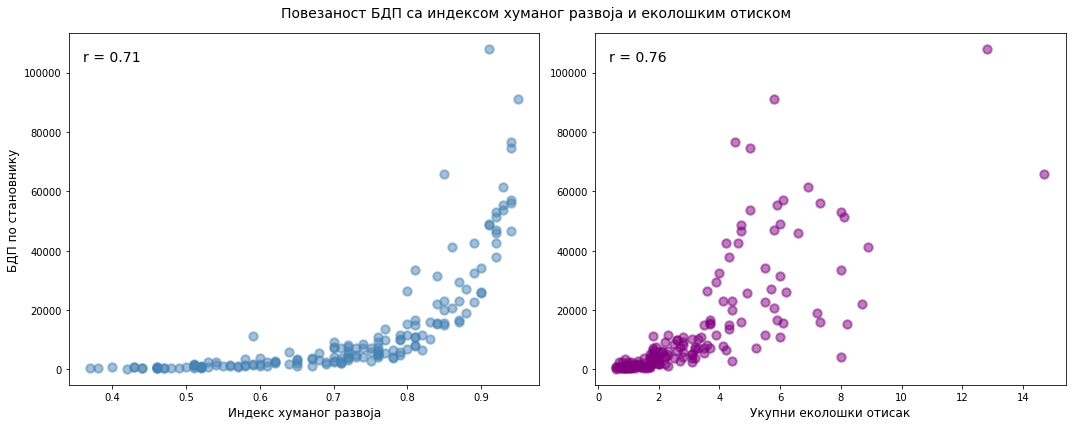

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Искључујемо државе код којих је вредност HDI 0, очигледно због грешке у подацима
otisakHDI = otisak[otisak['HDI'] > 0].copy()

ax1.scatter(x=otisakHDI['HDI'], y=otisakHDI['GDP per cap'], color='steelblue', alpha=0.5, s=70, linewidth=2)
ax1.text(0.03, 0.92, 'r = ' + str(otisakHDI[['HDI', 'GDP per cap']].corr().iloc[0,1].round(2)), transform = ax1.transAxes, fontsize=14)
ax1.set_ylabel('БДП по становнику', fontsize=12)
ax1.set_xlabel('Индекс хуманог развоја', fontsize=12)

ax2.scatter(x=otisakHDI['Total Ecological Footprint'], y=otisakHDI['GDP per cap'], color='purple', alpha=0.5, s=70, linewidth=2)
ax2.text(0.03, 0.92, 'r = ' + str(otisakHDI[['Total Ecological Footprint', 'GDP per cap']].corr().iloc[0,1].round(2)), transform = ax2.transAxes, fontsize=14)
ax2.set_xlabel('Укупни еколошки отисак', fontsize=12)

fig.suptitle('Повезаност БДП са индексом хуманог развоја и еколошким отиском', fontsize=14)
fig.tight_layout()

Познато је да се вредност БДП по становнику __[не може сматрати мером благостања нације](https://hbr.org/2019/10/gdp-is-not-a-measure-of-human-well-being)__. То је посебно очигледно на плавом графикону у групи дражава са нижим индексом хуманог развоја. Једно од могућих објашњења је делатност страних компанија које остварују профит на теротирији неке државе, али релативно мали проценат тог профита завршава код становника те државе. Са друге стране, чини се да је већа економска активност повезана са већим еколошким отиском, мада и у овом случају треба обратити пажњу на аберантне резултате на љубичастом графикону.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Покушајте да процените колика је корелација индекса хуманог развоја и дужине животног века на основу изгледа плавог и црвено-зеленог графикона. Пратећи упутство у <a href='https://pandas.pydata.org/pandas-docs/version/1.1.5/user_guide/style.html' target='_blank'>овом тексту</a> направите стилизовану корелациону матрицу варијабли које смо до сада описали да бисте проверили тачност процене. Упоредите своје решење са кодом у датотеци <a href='podaci/matrica.txt' target='_blank'>matrica.txt</a>.</div>

Одрживи развој подразумева развој друштва у коме се људске потребе задовољавају расположивим природним ресурсима. Тиме се осигурава дугорочно постојање људског друштва уз очување животне средине и биокапацитета планете. Према проценама организације чије податке користимо у овом одељку, човечанству су уз садашњу потрошњу биокапацитета потребне 1,73 планете Земље. То значи да трошимо природне ресурсе готово дупло брже него што природа успева да их обнови. У последњем примеру приказаћемо повезаност индекса хуманог развоја и броја потребних Земаља како бисмо утврдили које државе су успешније, а које мање успешне у остваривању циљева одрживог развоја. Овога пута ћемо употребити посебну врсту дијаграма распршења у коме се, уз вредности две варијабле на осама, приказује и трећа варијабле као величина круга. Због тога је овај графикон познат и као *мехурасти дијаграм* (енгл. *bubble chart*). U našem primeru, veličinu krugova ćemo definisati na osnovu broja stanovnika svake države, tj. varijable *Population (mil)*. 

In [4]:
import plotly.express as px

otisakHDI.replace({'EU-28': 'Европа', 
                     'Other Europe': 'Европа',
                     'Africa': 'Африка',
                     'Asia-Pacific': 'Азија-Пацифик',
                     'North America': 'Северна Америка',
                     'South America': 'Јужна Америка',
                     'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                     'Central America/Caribbean': 'Централна Америка'
                    }, inplace=True)

graf = px.scatter(otisakHDI, x='HDI', y='Number of Earths required',
                    size='Population (mil)', size_max=50,
                    color='Region', hover_name='Country',
                    template='plotly_white', width=800, height=500,
                    range_x=[0.3,1], range_y=[0,6]
                   )

graf.add_hline(y=1, line_width=0.5, line_dash='dot', line_color='green') # Референтна вредност за број планета
graf.add_vline(x=0.7, line_width=0.5, line_dash='dot', line_color='green') # Референтна вредност високох индекса хуманог развоја
graf.add_hrect(y0=0, y1=1, x0=(0.7-0.3)/0.7, x1=1, line_width=0, fillcolor='green', opacity=0.2) # Квадрант одрживог развоја

graf.update_layout(margin=dict(l=60, r=20, t=30, b=60), 
                   legend=dict(title='Регион', y=0.99, x=0.05, bgcolor='rgba(0,0,0,0)'),
                   xaxis_title='Индекс хуманог развоја', yaxis_title='Број потребних планета'
                  )

graf.add_annotation(dict(font=dict(color='green',size=13),
                         x=0.97, y=0.35, xanchor='right', yanchor='bottom',
                         showarrow=False, text='Квадрант глобалног одрживог развоја'
                        )
                   )

graf.show()

На графикону су линијама означене две референтне вредности. Прва је вертикална линија изнад вредности 0,7 која се сматра границом високог индекса хуманог развоја, а друга је хоризонтална линија наспрам вредности 1 која означава да потрошња државе одговара тренутним биокапацитетима планете Земље. Donji desni pravougaonik ograničen ovim linijama predstavlja tzv. *kvadrant održivog razvoja*. Видимо да се само неколико држава налази у овом квадранту или близу њега. Већина је или у доњем левом или у горњем десном квадранту. Прву групу чине државе, углавном оне са афричког континента, које имају ниске вредности еколошког отиска, али и ниске вредности индекса хуманог развоја. У другој групи се налази САД и већина високо развијених европских држава које уједно имају и изузетно велику потршњу биокапацитета. Na osnovu vrednosti na grafikonu možemo da vidimo da bi nam bilo potrebno čak 4 do 6 planeta kada bismo svi živeli kao građani SAD, Kanade, Australije ili Ujedinjenih Arapskih Emirata.  

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да ли бисте рекли да је величина популације, односно број становника неке државе, повезан са njenim razvojem ili ekološkim otiskom? Одговор на ово питање можете да добијете ако употребите код приказан у датотеци <a href='podaci/matrica.txt' target='_blank'>matrica.txt</a> који смо користили нешто раније.</div>

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да смо као почетну тачку квадранта одрживог развоја на x-оси (<b>x0</b>) поставили на вредност 0.7, правоугаоник не би био правилно исцртан. Уместо тога, координате смо израчунали као вредност израза <b>(0.7-0.3)/0.7</b>. Da li možete da otkrijete kako smo došli do njega? Обратите пажњу на дефинисани распон вредности x-осе.</div>